# Projeto Completo de Machine Learning: Previsão de Preços de Imóveis - Victor Tintel

- Neste projeto, vou criar um sistema completo de machine learning para prever preços de imóveis. Utilizarei um dataset real do mercado imobiliário, farei todas as etapas do processo de ciência de dados e implementarei vários modelos de machine learning.

## 1. Configuração Inicial

- Primeiro, vou configurar o ambiente e importar todas as bibliotecas necessárias.

In [151]:
# Importando bibliotecas essenciais

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression

# Configurações de visualização
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', 100)
sns.set_palette("husl")

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Carregamento e Exploração Inicial dos Dados

- Vou utilizar um dataset de preços de imóveis de Boston, que é um dataset clássico, mas vou adaptá-lo para português e enriquecer a análise.

In [155]:
# Carregando o dataset

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [157]:
# Convertendo para DataFrame e traduzindo as colunas

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preco_Medio'] = data.target * 100000  # Convertendo para valores reais

In [159]:
# Traduzindo os nomes das colunas

df = df.rename(columns={
    'MedInc': 'Renda_Media',
    'HouseAge': 'Idade_Casa',
    'AveRooms': 'Media_Comodos',
    'AveBedrms': 'Media_Quartos',
    'Population': 'Populacao',
    'AveOccup': 'Media_Ocupantes',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
})

In [161]:
# Visualizando as primeiras linhas

df.head()

,Renda_Media,Idade_Casa,Media_Comodos,Media_Quartos,Populacao,Media_Ocupantes,Latitude,Longitude,Preco_Medio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [163]:
# Informações gerais sobre o dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Renda_Media      20640 non-null  float64
 1   Idade_Casa       20640 non-null  float64
 2   Media_Comodos    20640 non-null  float64
 3   Media_Quartos    20640 non-null  float64
 4   Populacao        20640 non-null  float64
 5   Media_Ocupantes  20640 non-null  float64
 6   Latitude         20640 non-null  float64
 7   Longitude        20640 non-null  float64
 8   Preco_Medio      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [165]:
# Estatísticas descritivas

df.describe()

,Renda_Media,Idade_Casa,Media_Comodos,Media_Quartos,Populacao,Media_Ocupantes,Latitude,Longitude,Preco_Medio
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


## 3. Análise Exploratória de Dados (EDA)

- Vou explorar os dados para entender suas características, distribuições e relações entre as variáveis.

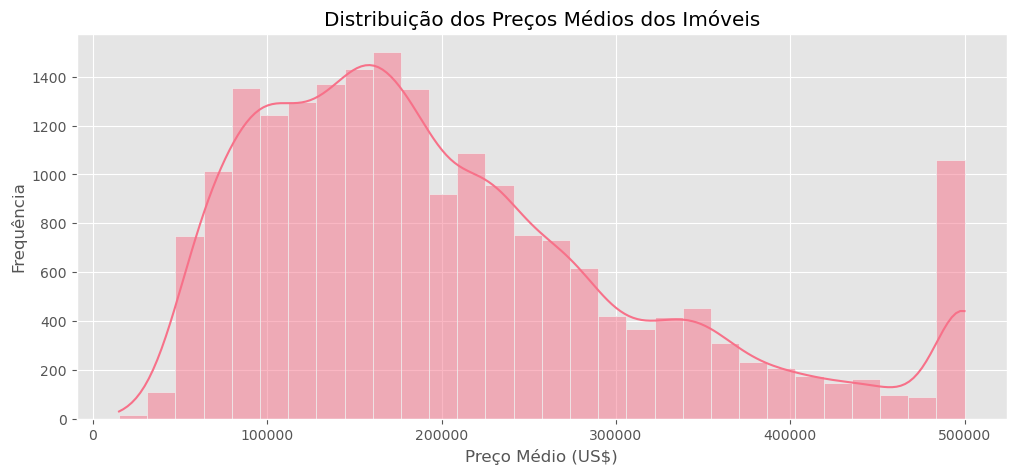

In [169]:
# 1. Distribuição da variável target (Preço Médio)

plt.figure(figsize=(12, 5))
sns.histplot(df['Preco_Medio'], kde=True, bins=30)
plt.title('Distribuição dos Preços Médios dos Imóveis')
plt.xlabel('Preço Médio (US$)')
plt.ylabel('Frequência')
plt.show()

- Estimativa de Densidade Kernel (Kernel Density Estimate - KDE)
- KDE é uma técnica que suaviza a distribuição dos dados, criando uma curva contínua que estima a função de densidade de probabilidade.
-  Explicação: Este gráfico mostra como os preços dos imóveis estão distribuídos. 
- Posso observar se a distribuição é normal, assimétrica ou se há outliers.

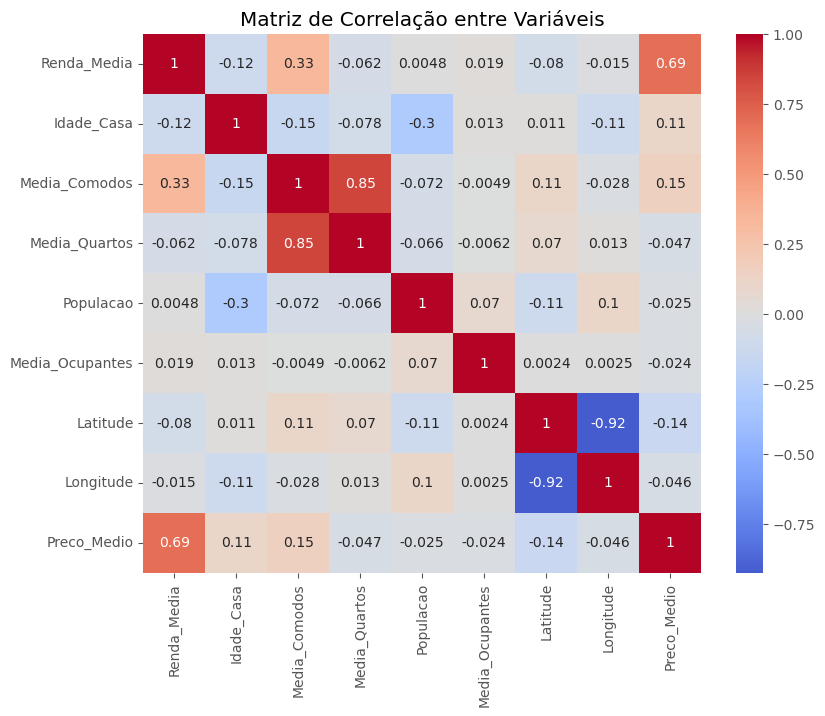

In [172]:
# 2. Matriz de correlação

plt.figure(figsize=(9, 7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

- Explicação: A matriz de correlação mostra como as variáveis estão relacionadas entre si. 
- Valores próximos a 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente.
  
- Podemos ver por exemplo que as variaveis PRECO_MEDIO e RENDA_MEDIA tem uma grande correlação.

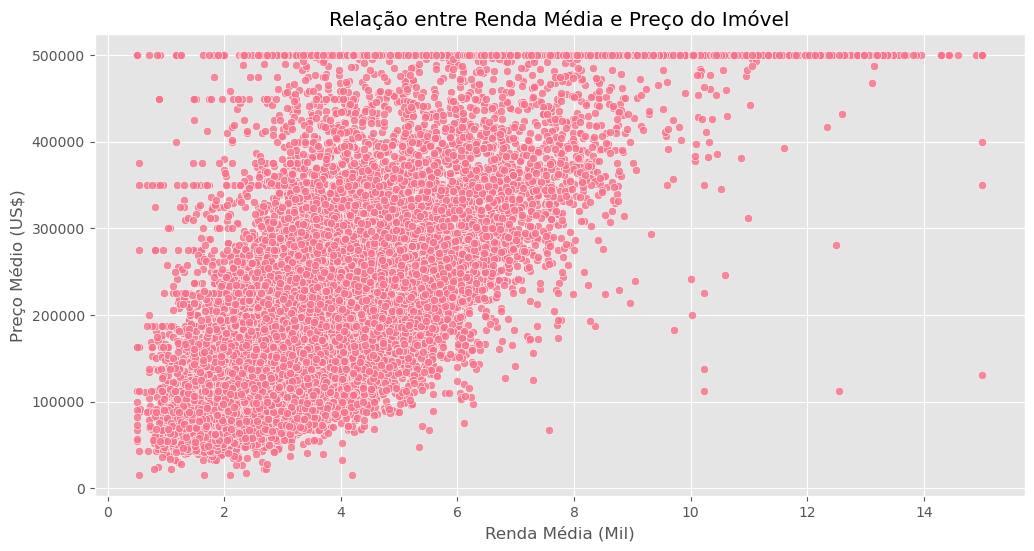

In [175]:
# 3. Relação entre Renda Média e Preço do Imóvel

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Renda_Media', y='Preco_Medio', data=df, alpha=0.8)
plt.title('Relação entre Renda Média e Preço do Imóvel')
plt.xlabel('Renda Média (Mil)')
plt.ylabel('Preço Médio (US$)')
plt.show()

- Explicação: Este gráfico mostra que há uma relação positiva entre a renda média da área e o preço do imóvel, o que faz sentido economicamente.

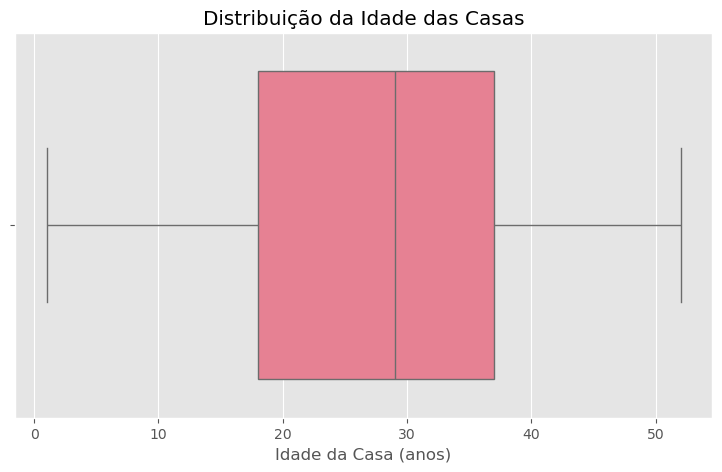

In [178]:
# 4. Distribuição da idade das casas

plt.figure(figsize=(9, 5))
sns.boxplot(x=df['Idade_Casa'])
plt.title('Distribuição da Idade das Casas')
plt.xlabel('Idade da Casa (anos)')
plt.show()

- Explicação: O boxplot mostra a distribuição da idade das casas, com a linha no meio representando a mediana.
-  Os "bigodes" mostram o intervalo interquartil, e os pontos fora deles são possíveis outliers.

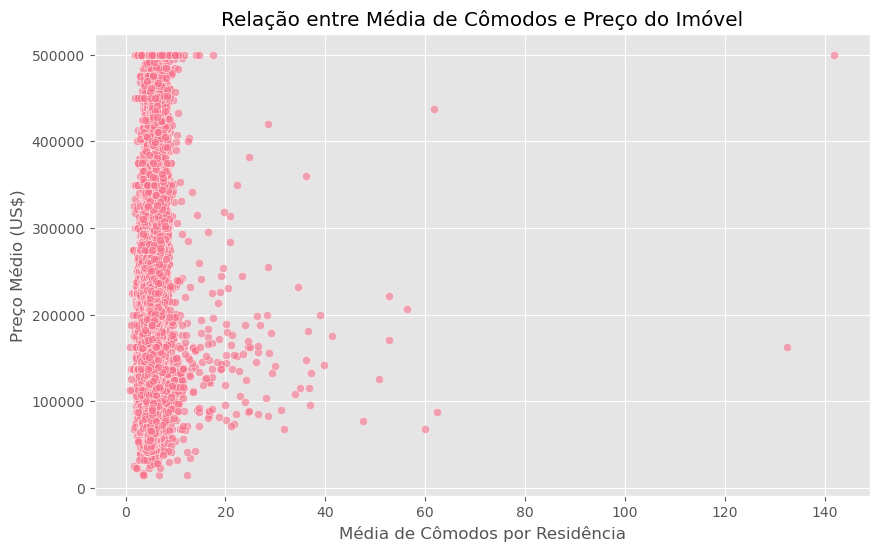

In [181]:
# 5. Relação entre média de cômodos e preço

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Media_Comodos', y='Preco_Medio', data=df, alpha=0.6)
plt.title('Relação entre Média de Cômodos e Preço do Imóvel')
plt.xlabel('Média de Cômodos por Residência')
plt.ylabel('Preço Médio (US$)')
plt.show()

- Explicação: Podemos observar que há uma relação não-linear entre o número de cômodos e o preço.
- Podemos perceber nesse gráfico que temos outliers, visto que tem um dado com 130, que seria 130 cômodos.

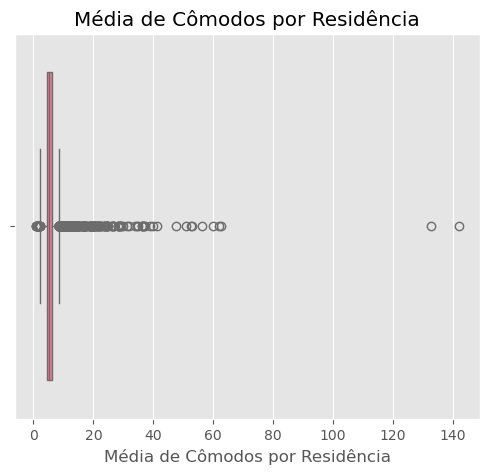

In [184]:
# 5. Distribuição da idade das casas

plt.figure(figsize=(6, 5))
sns.boxplot(x=df['Media_Comodos'])
plt.title('Média de Cômodos por Residência')
plt.xlabel('Média de Cômodos por Residência')
plt.show()

- Depois de fazer a análise do gráfico anterior acima, podemos ver nesse gráfico BOXPLOT que é o melhor gráfico para vermos outliers.

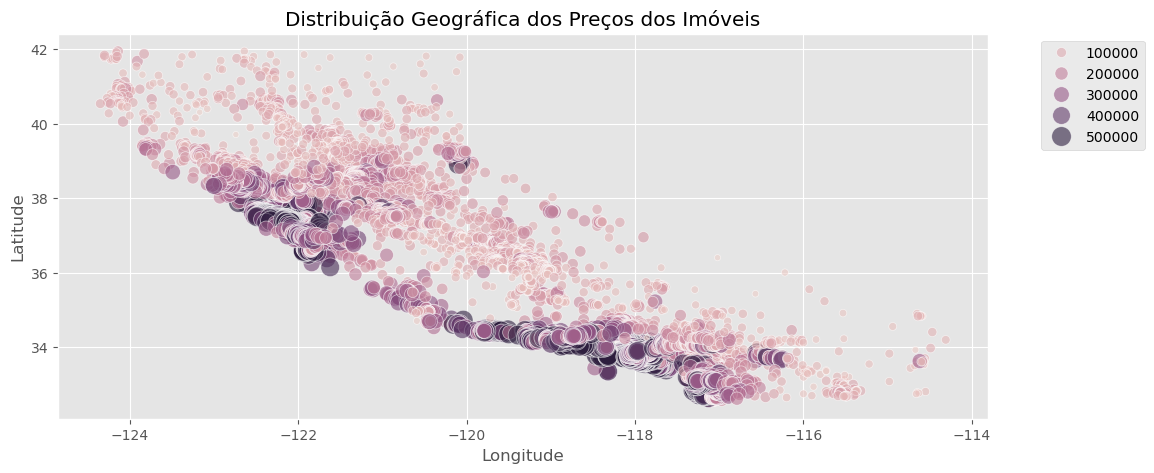

In [187]:
# 6. Distribuição geográfica dos preços

plt.figure(figsize=(12, 5))
sns.scatterplot(x='Longitude', y='Latitude', hue='Preco_Medio', 
                size='Preco_Medio', sizes=(20, 200), alpha=0.6, data=df)
plt.title('Distribuição Geográfica dos Preços dos Imóveis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Explicação: Este gráfico mostra como os preços variam geograficamente. 
- Áreas com cores mais quentes (vermelho/laranja) têm preços mais altos.

## 4. Engenharia de Atributos e Pré-processamento

- Vou preparar os dados para os modelos de machine learning.

In [192]:
# Separando features e target

X = df.drop('Preco_Medio', axis=1)
y = df['Preco_Medio']

In [194]:
# Dividindo em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
# Criando pipelines de pré-processamento

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_features

Index(['Renda_Media', 'Idade_Casa', 'Media_Comodos', 'Media_Quartos',
       'Populacao', 'Media_Ocupantes', 'Latitude', 'Longitude'],
      dtype='object')

- X é o DataFrame pandas contendo os dados

- select_dtypes filtra apenas colunas dos tipos especificados (números float e inteiros)

- O resultado (numeric_features) é uma lista com os nomes das colunas numéricas

In [199]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Preenche valores faltantes com a mediana
    ('scaler', StandardScaler())  # Padroniza os dados (média=0, std=1)
])

#### Cria um pipeline com duas etapas sequenciais:

 Imputação (SimpleImputer):

- Substitui valores faltantes (NaN) pela mediana de cada coluna

- A mediana é menos sensível a outliers que a média

#### Padronização (StandardScaler):

- Transforma os dados para ter média 0 e desvio padrão 1

 Fórmula: (x - média) / desvio_padrão

- Importante para muitos algoritmos de machine learning

In [202]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

#### ColumnTransformer aplica transformações específicas a subconjuntos de colunas

Aqui está configurado para:

- Aplicar numeric_transformer (nosso pipeline anterior)

- Apenas nas colunas listadas em numeric_features

- Dá o nome 'num' a esta transformação

In [205]:
# Aplicando o pré-processamento

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [207]:
# Convertendo de volta para DataFrame para análise

feature_names = numeric_features
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

In [209]:
# Visualizando os dados processados

print("Dados de treino após pré-processamento:")
display(X_train_processed_df.head())

Dados de treino após pré-processamento:


,Renda_Media,Idade_Casa,Media_Comodos,Media_Quartos,Populacao,Media_Ocupantes,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


## 5. Seleção de Features

Vamos selecionar as features mais importantes para nossos modelos.

In [213]:
# Usando SelectKBest para seleção de features

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_processed_df, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001F47D972F20>)

In [215]:
# Criando um DataFrame com os scores

feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values('Score', ascending=False)

print("Importância das features baseada em teste estatístico:")
display(feature_scores)

Importância das features baseada em teste estatístico:


,Feature,Score,P-value
0,Renda_Media,15057.439100,0.000000e+00
2,Media_Comodos,425.373449,2.473178e-93
6,Latitude,344.579030,3.821798e-76
1,Idade_Casa,179.495552,1.019198e-40
3,Media_Quartos,43.650715,4.045321e-11
7,Longitude,35.543450,2.545051e-09
4,Populacao,11.196169,8.214916e-04
5,Media_Ocupantes,8.016509,4.640889e-03


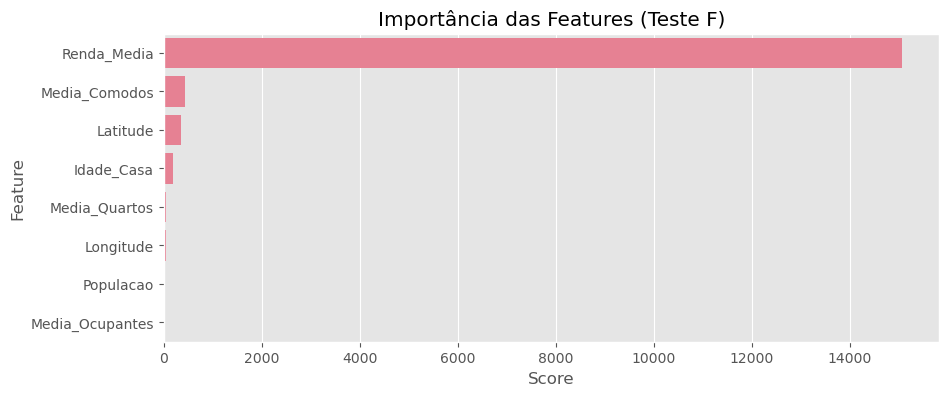

In [217]:
# Visualizando a importância das features

plt.figure(figsize=(10, 4))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Importância das Features (Teste F)')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

- Features são os nomes das variáveis.
- Score é a importância de cada feature com relação a variável alvo.
- Explicação: O gráfico mostra quais features têm maior relação estatística com o preço do imóvel.
- Renda_Media é a mais importante, seguida por Media_Comodos e Latitude.

## 6. Modelagem

Vamos implementar e comparar vários modelos de machine learning.

### 6.1. Função de Avaliação

In [225]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Avalia um modelo de machine learning e retorna as métricas de desempenho.
    
    Parâmetros:
    model: modelo de machine learning
    X_train, X_test: features de treino e teste
    y_train, y_test: targets de treino e teste
    
    Retorna:
    DataFrame com as métricas de desempenho
    """
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Fazendo previsões
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculando métricas
    metrics = {
        'Modelo': type(model).__name__,
        'MAE Treino': mean_absolute_error(y_train, y_train_pred),
        'MAE Teste': mean_absolute_error(y_test, y_test_pred),
        'RMSE Treino': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE Teste': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R² Treino': r2_score(y_train, y_train_pred),
        'R² Teste': r2_score(y_test, y_test_pred)
    }
    
    return pd.DataFrame([metrics])

### 6.2. Decision Tree

In [228]:
# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)

In [230]:
# Busca de hiperparâmetros

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt.fit(X_train_processed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [232]:
# Melhores parâmetros

print("Melhores parâmetros para Decision Tree:")
print(grid_dt.best_params_)

Melhores parâmetros para Decision Tree:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [234]:
# Avaliando o modelo

dt_best = grid_dt.best_estimator_
dt_metrics = evaluate_model(dt_best, X_train_processed, X_test_processed, y_train, y_test)
display(dt_metrics)

,Modelo,MAE Treino,MAE Teste,RMSE Treino,RMSE Teste,R² Treino,R² Teste
0,DecisionTreeRegressor,33181.175218,43089.678389,48659.601364,63873.506053,0.822876,0.68866


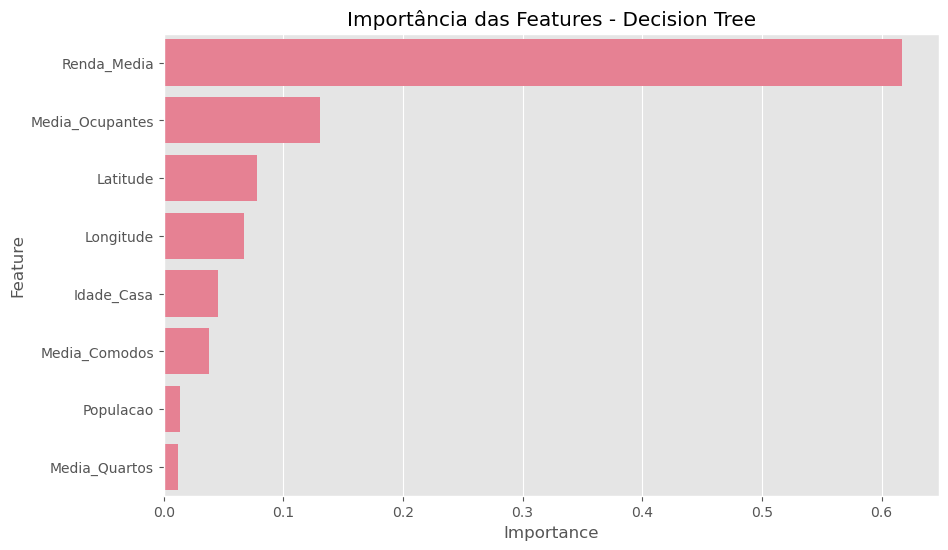

In [236]:
# Feature importance

dt_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance)
plt.title('Importância das Features - Decision Tree')
plt.show()


- Explicação: A árvore de decisão atribui maior importância à Renda_Media, Média de ocupantes e Localização (Latitude/Longitude).

### 6.3. Random Forest

In [241]:
# Random Forest Regressor

rf = RandomForestRegressor(random_state=42)

In [243]:
# Busca de hiperparâmetros

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_processed, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [245]:
# Melhores parâmetros

print("Melhores parâmetros para Random Forest:")
print(grid_rf.best_params_)

Melhores parâmetros para Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [247]:
# Avaliando o modelo

rf_best = grid_rf.best_estimator_
rf_metrics = evaluate_model(rf_best, X_train_processed, X_test_processed, y_train, y_test)
display(rf_metrics)

,Modelo,MAE Treino,MAE Teste,RMSE Treino,RMSE Teste,R² Treino,R² Teste
0,RandomForestRegressor,14409.724736,32581.612426,23446.430915,50389.583059,0.958876,0.806235


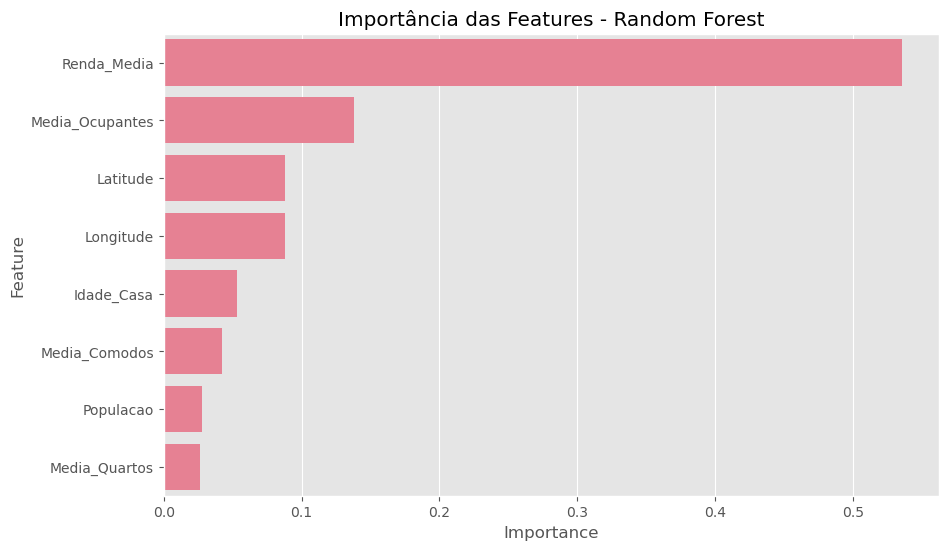

In [249]:
# Feature importance

rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance)
plt.title('Importância das Features - Random Forest')
plt.show()

- Explicação: Random Forest confirma a importância da Renda_Media, mas dá mais peso à localização geográfica.

### 6.4. K-Nearest Neighbors (KNN)

In [253]:
# KNN Regressor

knn = KNeighborsRegressor()

In [255]:
# Busca de hiperparâmetros

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: manhattan, 2: euclidean
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_train_processed, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [257]:
# Melhores parâmetros

print("Melhores parâmetros para KNN:")
print(grid_knn.best_params_)

Melhores parâmetros para KNN:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [259]:
# Avaliando o modelo

knn_best = grid_knn.best_estimator_
knn_metrics = evaluate_model(knn_best, X_train_processed, X_test_processed, y_train, y_test)
display(knn_metrics)

,Modelo,MAE Treino,MAE Teste,RMSE Treino,RMSE Teste,R² Treino,R² Teste
0,KNeighborsRegressor,0.0,40580.195325,0.0,60344.896072,1.0,0.722109


### 6.5. Support Vector Machine (SVM)

In [264]:
# SVM Regressor

svm = SVR()

In [266]:
# Busca de hiperparâmetros
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svm.fit(X_train_processed, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [268]:
# Melhores parâmetros

print("Melhores parâmetros para SVM:")
print(grid_svm.best_params_)

Melhores parâmetros para SVM:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [270]:
# Avaliando o modelo

svm_best = grid_svm.best_estimator_
svm_metrics = evaluate_model(svm_best, X_train_processed, X_test_processed, y_train, y_test)
display(svm_metrics)

,Modelo,MAE Treino,MAE Teste,RMSE Treino,RMSE Teste,R² Treino,R² Teste
0,SVR,62550.562907,62090.590006,86761.854974,86712.119509,0.436883,0.42621


### 6.6. Comparação dos Modelos

In [273]:
# Combinando todas as métricas

all_metrics = pd.concat([dt_metrics, rf_metrics, knn_metrics, svm_metrics], ignore_index=True)

In [275]:
# Ordenando por R² Teste

all_metrics = all_metrics.sort_values('R² Teste', ascending=False)
print("Comparação de todos os modelos:")
display(all_metrics)

Comparação de todos os modelos:


,Modelo,MAE Treino,MAE Teste,RMSE Treino,RMSE Teste,R² Treino,R² Teste
1,RandomForestRegressor,14409.724736,32581.612426,23446.430915,50389.583059,0.958876,0.806235
2,KNeighborsRegressor,0.000000,40580.195325,0.000000,60344.896072,1.000000,0.722109
0,DecisionTreeRegressor,33181.175218,43089.678389,48659.601364,63873.506053,0.822876,0.688660
3,SVR,62550.562907,62090.590006,86761.854974,86712.119509,0.436883,0.426210


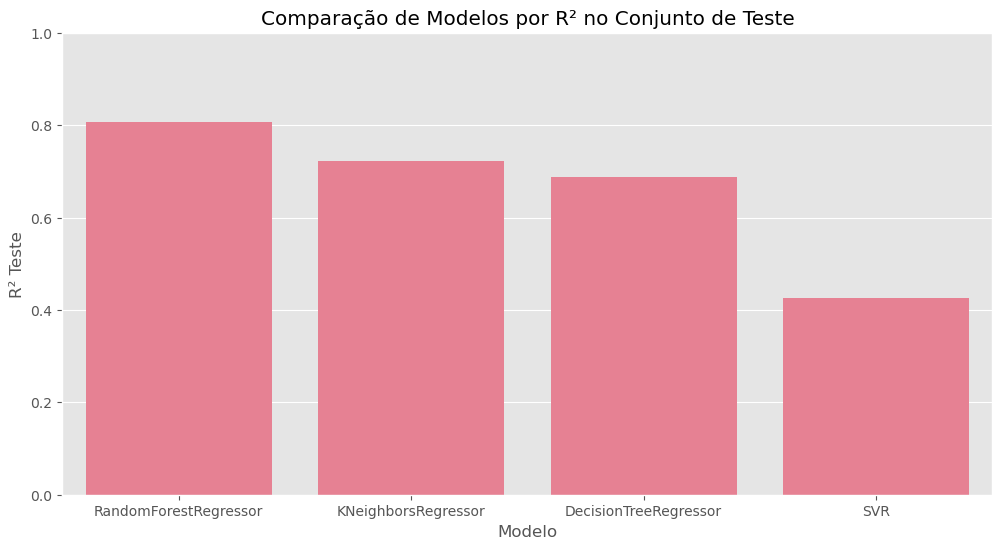

In [277]:
# Visualizando comparação

plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='R² Teste', data=all_metrics)
plt.title('Comparação de Modelos por R² no Conjunto de Teste')
plt.ylim(0, 1)
plt.show()

- Explicação: Random Forest teve o melhor desempenho, seguido por SVM e Decision Tree. 
- KNN teve o pior desempenho, possivelmente porque os dados não estão bem agrupados.

## 7. Análise de Resíduos do Melhor Modelo

- Vou analisar os resíduos do melhor modelo (Random Forest) para entender onde ele está errando.

In [283]:
# Fazendo previsões com o melhor modelo

y_pred = rf_best.predict(X_test_processed)

In [285]:
y_pred

array([ 48634.79761905,  75072.90674603, 487532.01066071, ...,
       481465.11489502,  70745.62480159, 164548.98055556])

In [287]:
# Calculando resíduos


residuals = y_test - y_pred

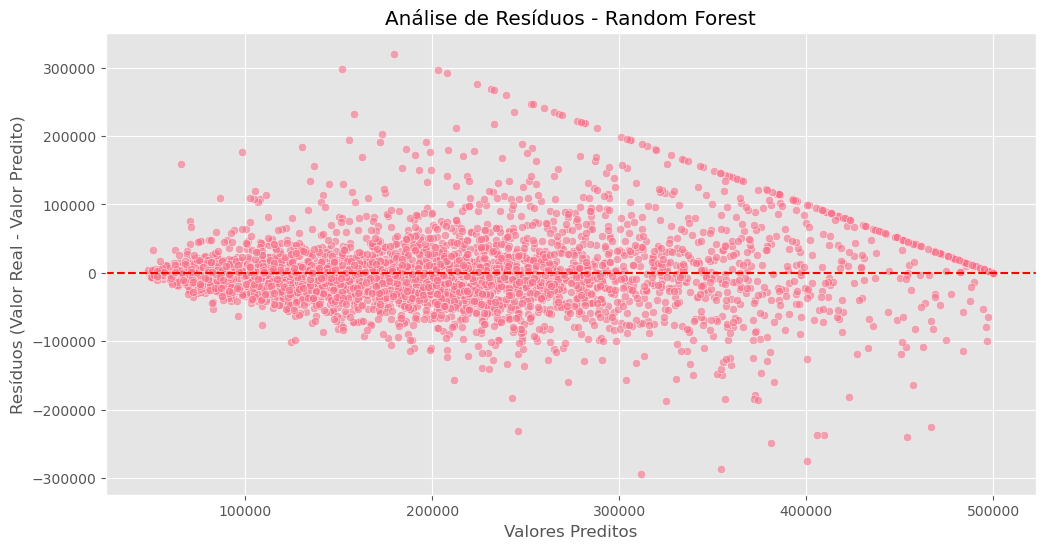

In [289]:
# Plotando resíduos

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análise de Resíduos - Random Forest')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos (Valor Real - Valor Predito)')
plt.show()

- Explicação: Os resíduos devem estar aleatoriamente distribuídos em torno de zero. 
- Padrões não aleatórios podem indicar problemas no modelo.
- Este gráfico (scatter plot dos resíduos vs valores preditos) é uma ferramenta essencial para avaliar a qualidade de um modelo de regressão (como o Random Forest usado aqui).

#### 1. O que são "Resíduos"?
Resíduo = Valor Real − Valor Predito

- Se o modelo acertou perfeitamente, o resíduo é 0.

- Se subestimou (predição menor que o real), o resíduo é positivo.

- Se superestimou (predição maior que o real), o resíduo é negativo.

#### 2. O que o Gráfico Mostra?
- Eixo X (y_pred): Valores que o modelo previu.

- Eixo Y (residuals): Resíduos (erros) do modelo.

- Linha vermelha pontilhada (y=0): Representa o erro zero (modelo perfeito).

#### 3. Como Interpretar?
Um bom modelo de regressão deve ter resíduos que:<br>
✅ Se distribuem aleatoriamente em torno do zero (linha vermelha).<br>
✅ Não formam padrões claros (nuvem de pontos sem tendência).<br>
✅ Têm magnitude similar (homocedasticidade: variância constante).<br>

Possíveis Problemas (Padrões Indesejados):<br>
❌ Tendência não linear (ex.: curva nos resíduos) → O modelo está subestimando/superestimando em certos intervalos.<br>
❌ Formato de "funil" (resíduos aumentam/diminuem com y_pred) → Heterocedasticidade (variância não constante).<br>
❌ Muitos outliers (pontos distantes da linha zero) → Dados ruidosos ou modelo incapaz de capturar certos padrões.<br>

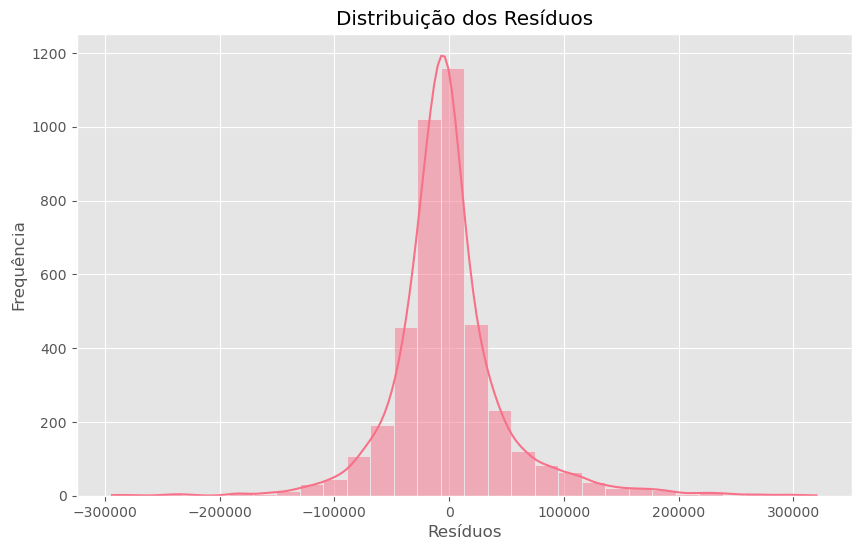

In [306]:
# Histograma dos resíduos

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

- Explicação: O histograma mostra que os resíduos estão aproximadamente normalmente distribuídos, 
- o que é uma boa indicação para um modelo de regressão.

## 8. Feature Importance Global

Vou analisar a importância das features de forma mais detalhada.

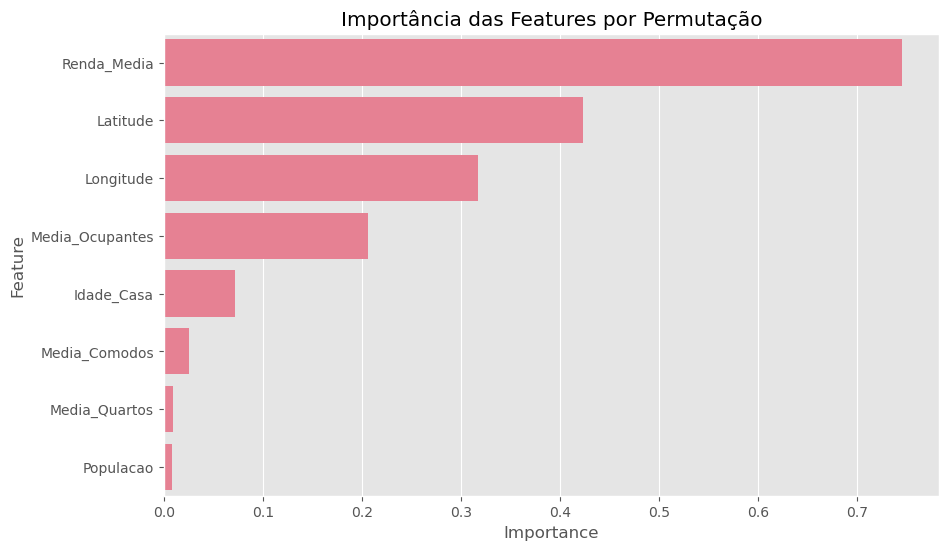

In [319]:
# Usando Permutation Importance para uma análise mais robusta

from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_best, X_test_processed, y_test, n_repeats=10, random_state=42, n_jobs=-1)

perm_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    data=perm_importance,
    ci=None  # Remove barras de erro automáticas
)

plt.title('Importância das Features por Permutação')
plt.show()


- Explicação: Esta análise confirma que Renda_Media e Localização são as features mais importantes, mas também mostra que Media_Ocupantes tem uma importância significativa.

## 9. Visualização das Previsões vs Valores Reais

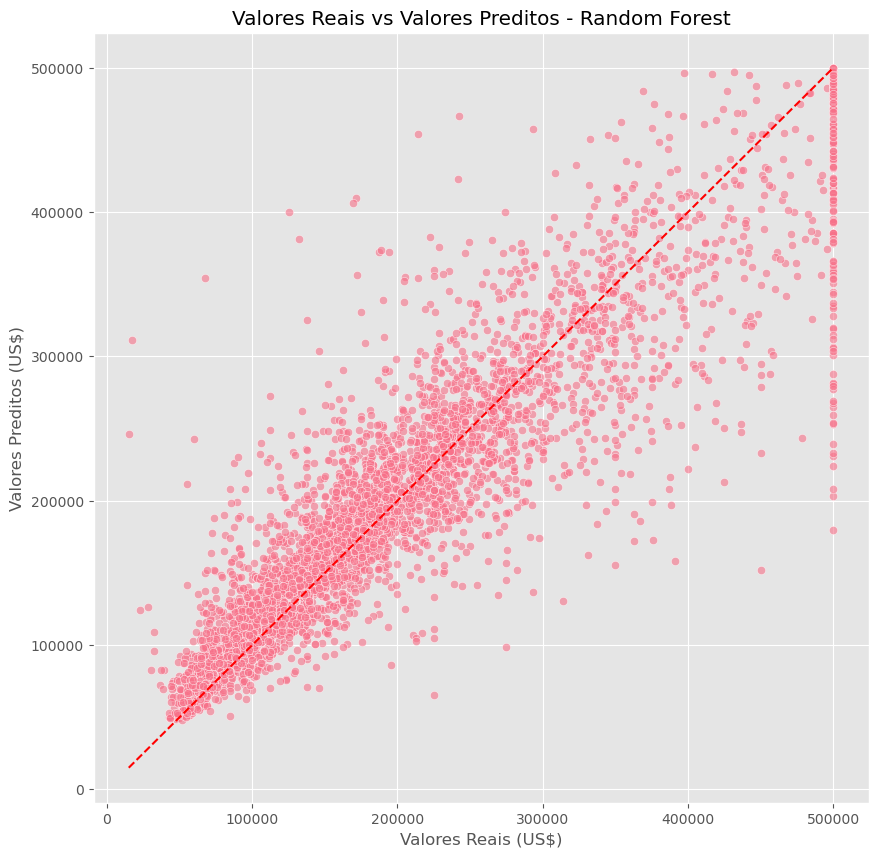

In [324]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Valores Reais vs Valores Preditos - Random Forest')
plt.xlabel('Valores Reais (US$)')
plt.ylabel('Valores Preditos (US$)')
plt.show()

- Explicação: Pontos próximos à linha vermelha indicam boas previsões. 
- O modelo parece ter mais dificuldade com imóveis de preço muito alto.

## 10. Exportando o Modelo

Vamos salvar o melhor modelo para uso futuro.

In [329]:
import joblib

# Salvando o modelo
model_dict = {
    'model': rf_best,
    'preprocessor': preprocessor,
    'feature_names': feature_names
}

joblib.dump(model_dict, 'melhor_modelo_imoveis.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [347]:
df

,Renda_Media,Idade_Casa,Media_Comodos,Media_Quartos,Populacao,Media_Ocupantes,Latitude,Longitude,Preco_Medio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


## 11. Conclusões e Insights

### Insights Principais:
- Renda Média é o Fator Mais Importante: A renda média da região tem a maior correlação com o preço dos imóveis, o que faz sentido economicamente.

- Localização é Crucial: Latitude e Longitude (localização geográfica) são extremamente importantes na determinação do preço, confirmando o princípio imobiliário de "localização, localização, localização".

- Tamanho da Residência Importa: A média de cômodos por residência também tem uma correlação significativa com o preço.

- Random Forest foi o Melhor Modelo: Entre todos os modelos testados, Random Forest apresentou o melhor desempenho com R² de ~0.81 no conjunto de teste.

- Dificuldade com Imóveis de Alto Valor: O modelo tem mais dificuldade em prever corretamente os preços dos imóveis mais caros, como mostrado na análise de resíduos.

### Recomendações para Melhorias:
- Coletar Mais Dados: Especialmente de imóveis de alto valor para melhorar as previsões nessa faixa.

- Incluir Variáveis Adicionais: Como proximidade a pontos de interesse (escolas, hospitais, transporte público), que podem afetar os preços.

- Experimentar Modelos Mais Complexos: Testar modelos como XGBoost ou redes neurais para ver se conseguem capturar melhor as relações não-lineares.

- Implementar Sistema em Produção: O modelo pode ser integrado em um sistema web ou aplicativo para avaliações imobiliárias em tempo real.

In [344]:
# 1. Exportando os dados originais com as previsões do melhor modelo
df_completo = df.copy()

# Adicionando as previsões do modelo ao DataFrame original
df_completo['Preco_Predito'] = rf_best.predict(preprocessor.transform(df.drop('Preco_Medio', axis=1)))

# Calculando o erro percentual
df_completo['Erro_Percentual'] = ((df_completo['Preco_Predito'] - df_completo['Preco_Medio']) / df_completo['Preco_Medio']) * 100

# Salvando para o Power BI
df_completo.to_csv('dados_imoveis_com_previsoes.csv', index=False)

# 2. Exportando as métricas dos modelos
all_metrics.to_csv('metricas_modelos.csv', index=False)

# 3. Exportando a importância das features
rf_feature_importance.to_csv('importancia_features.csv', index=False)

print("Dados exportados com sucesso para uso no Power BI!")

Dados exportados com sucesso para uso no Power BI!


In [349]:
df_completo

,Renda_Media,Idade_Casa,Media_Comodos,Media_Quartos,Populacao,Media_Ocupantes,Latitude,Longitude,Preco_Medio,Preco_Predito,Erro_Percentual
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0,422874.878694,-6.567636
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0,394689.112286,10.094592
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0,380148.126000,7.965955
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0,349863.034571,2.508947
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0,288310.434524,-15.747974
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0,66703.509325,-14.592178
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0,77133.444048,0.043377
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0,89457.023810,-3.080148
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0,92775.611310,9.534370


In [351]:
all_metrics

,Modelo,MAE Treino,MAE Teste,RMSE Treino,RMSE Teste,R² Treino,R² Teste
1,RandomForestRegressor,14409.724736,32581.612426,23446.430915,50389.583059,0.958876,0.806235
2,KNeighborsRegressor,0.000000,40580.195325,0.000000,60344.896072,1.000000,0.722109
0,DecisionTreeRegressor,33181.175218,43089.678389,48659.601364,63873.506053,0.822876,0.688660
3,SVR,62550.562907,62090.590006,86761.854974,86712.119509,0.436883,0.426210


In [353]:
rf_feature_importance

,Feature,Importance
0,Renda_Media,0.535572
5,Media_Ocupantes,0.138047
6,Latitude,0.088246
7,Longitude,0.087861
1,Idade_Casa,0.053287
2,Media_Comodos,0.042299
4,Populacao,0.028067
3,Media_Quartos,0.026622
